In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import multiprocessing
import time
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

Filtracja z wykorzystaniem konwolucji dla losowej tablicy wartości

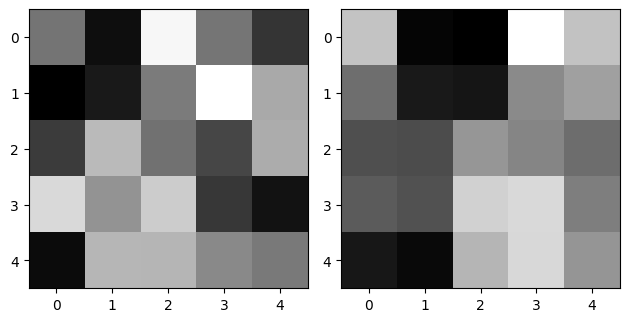

In [2]:
image = np.random.random((5, 5))
sobel_filter = np.array([[-1, 0, 1], 
                         [-2, 0, 2], 
                         [-1, 0, 1]])

filtered_image = ndimage.convolve(image, sobel_filter)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')

plt.tight_layout()
plt.show()

Filtracja z wykorzystaniem konwolucji dla zdjęcia w formacie png

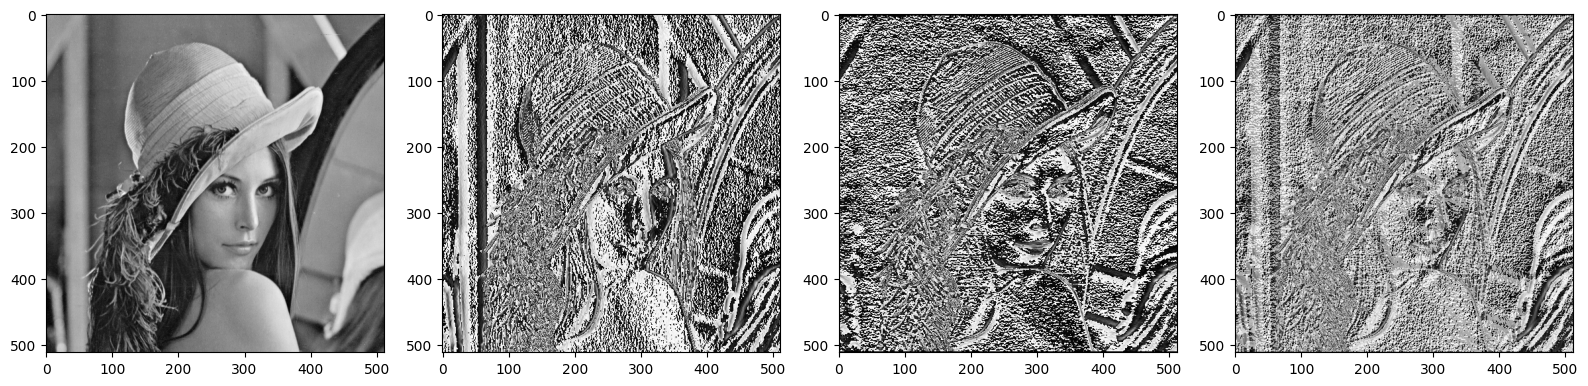

In [ ]:
image_path = 'lenna.png'
image = Image.open(image_path).convert('L')
image_array = np.array(image)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

edges_x = ndimage.convolve(image_array, sobel_x)
edges_y = ndimage.convolve(image_array, sobel_y)

# edges = np.sqrt(np.square(edges_x) + np.square(edges_y))
edges = np.hypot(edges_x, edges_y)  # faster, but kinda equivalent to the above

edges = edges / edges.max() * 255

plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.imshow(image_array, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(edges_x, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(edges_y, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(edges, cmap='gray')

plt.tight_layout()
plt.show()


Równoległe przetwarzanie z użyciem biblioteki concurrent.futures

In [11]:
def compute_cube(number):
    return number * number * number

numbers = [1, 2, 3, 4]
with ThreadPoolExecutor(max_workers=2) as executor:
    results = list(executor.map(compute_cube, numbers))
print("Wyniki:", results)
# NIE DZIAŁA W JUPYTER NOTEBOOKU, jeśli użyję ProcessPoolExecutor

Wyniki: [1, 8, 27, 64]


Równoległe przetwarzanie z użyciem biblioteki multiprocessing

In [ ]:
def compute_square(number):
    return number * number

numbers = [1, 2, 3, 4]
with multiprocessing.Pool(processes=2) as pool:
    results = pool.map(compute_square, numbers)
print("Wyniki:", results)
# NIE DZIAŁA W JUPYTER NOTEBOOKU